# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['labels'])

# TODO: Number of testing examples.
n_test = len(test['labels'])

# TODO: What's the shape of an traffic sign image?
image_shape = test['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(train['labels']))



print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

/home/hyukpyohong/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


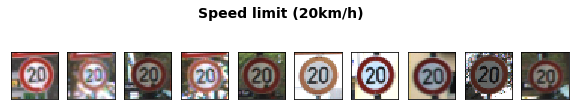

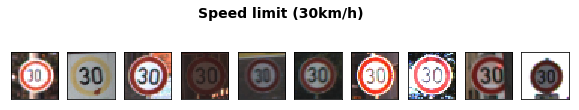

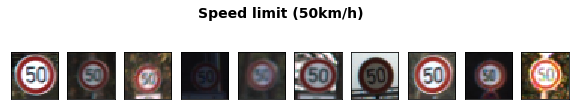

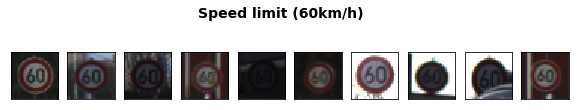

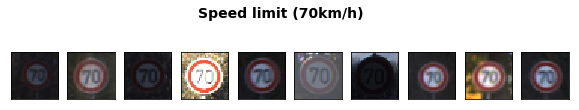

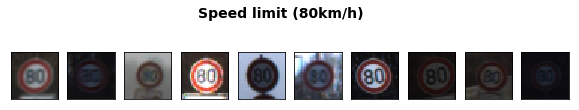

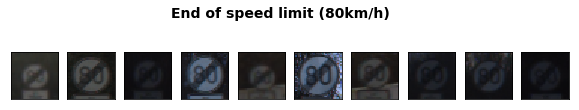

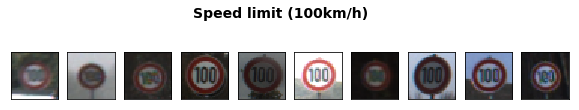

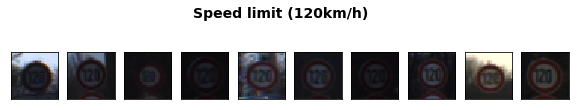

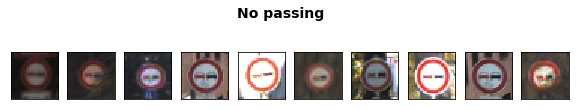

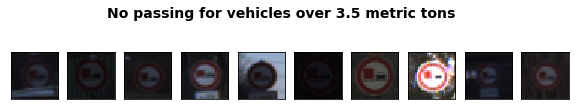

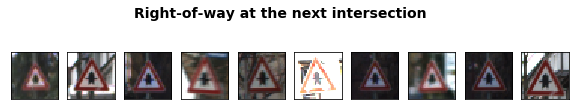

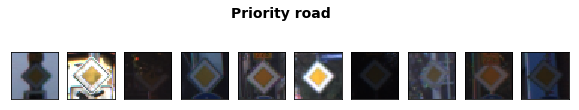

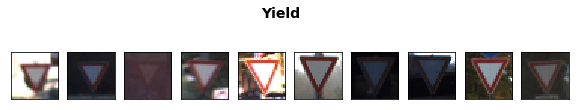

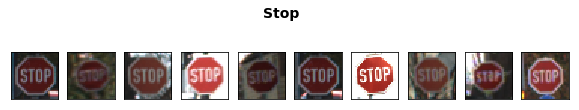

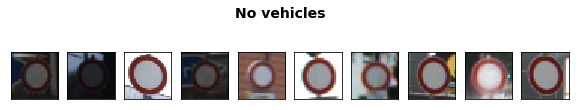

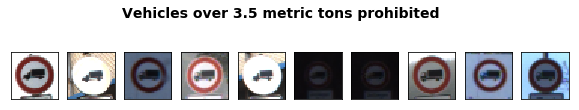

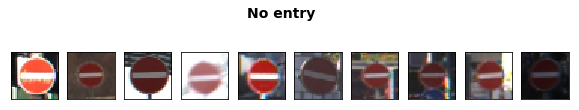

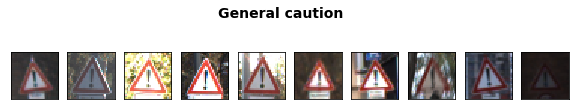

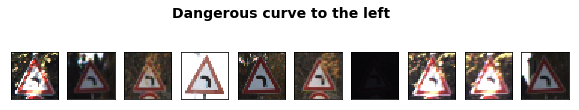

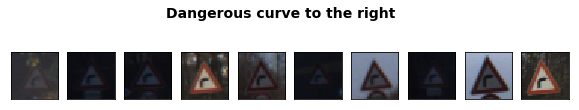

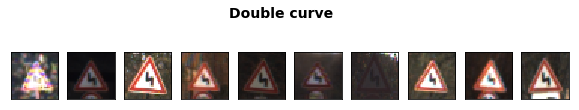

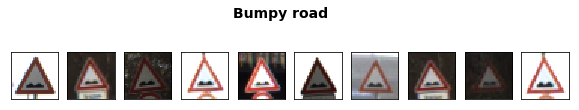

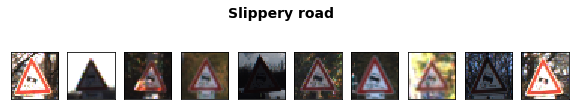

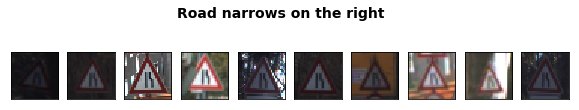

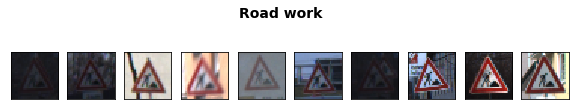

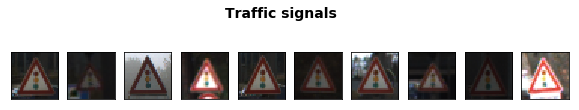

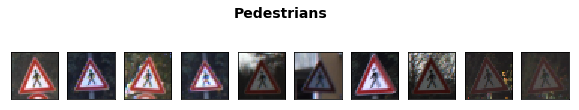

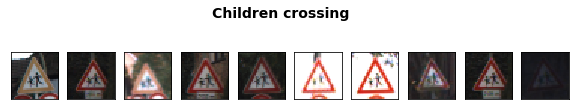

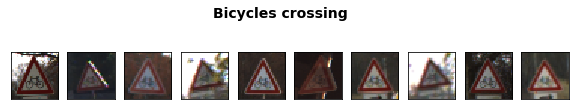

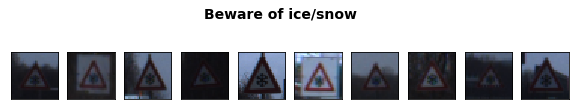

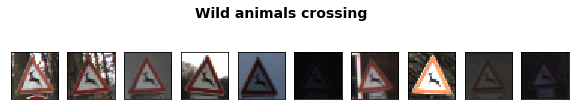

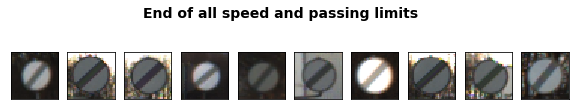

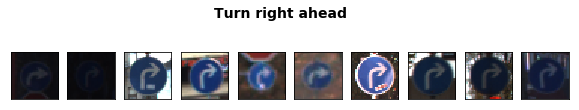

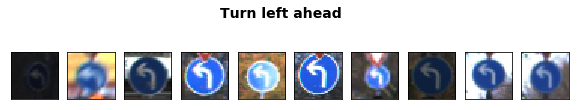

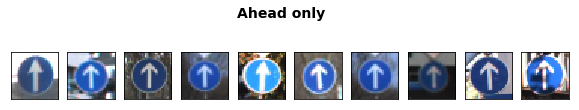

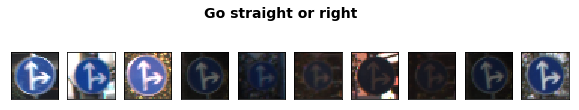

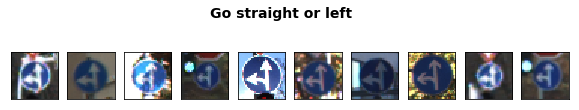

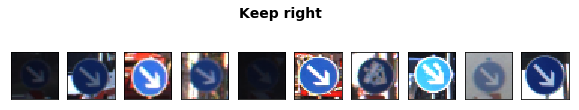

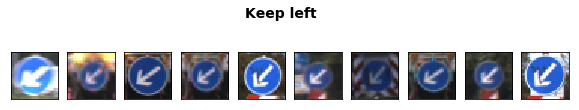

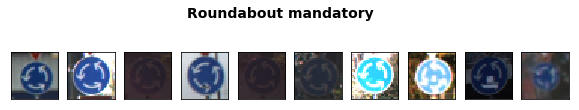

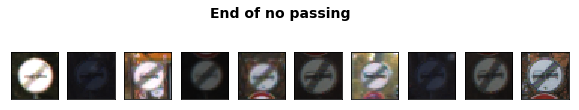

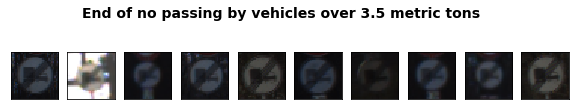

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import matplotlib.gridspec as gridspec

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)    

signnames={}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)        
    signnames = {rows[0]:rows[1] for rows in reader}
    signnames.pop('ClassId')   

def showSample():
    for num in range(n_classes):
        plt.figure(num)    
        fig, axes = plt.subplots(1,10, figsize=(10,2),subplot_kw={'xticks': [], 'yticks': []})    
        plt.suptitle(signnames[str(num)], fontsize=14, fontweight='bold')
        index = np.where(y_train==num)
        index = np.array(index).flatten()    
        index = np.random.choice(index,10,replace=False)        
        a=0
        for ax in axes.flat:                          
            image = X_train[index[a]].squeeze()     
            ax.imshow(image)
            a+=1

showSample()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/hyukpyohong/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


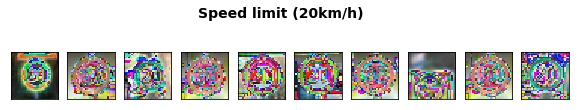

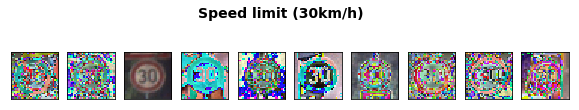

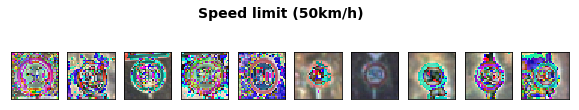

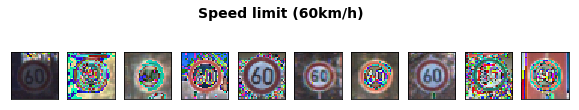

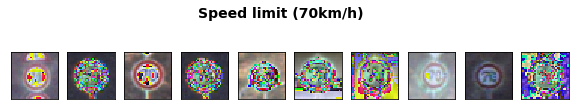

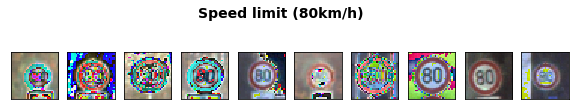

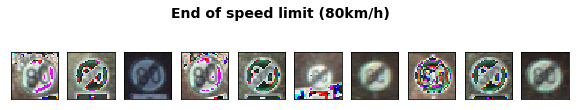

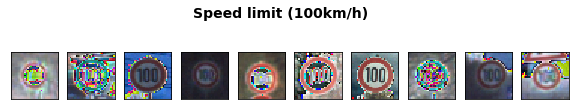

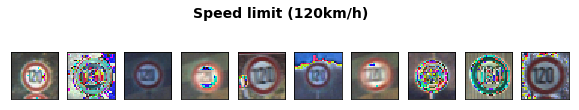

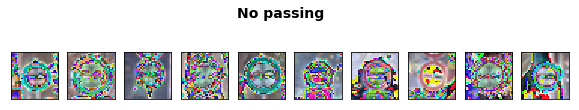

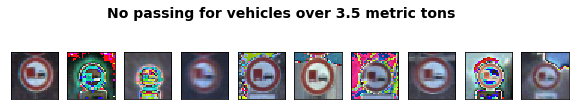

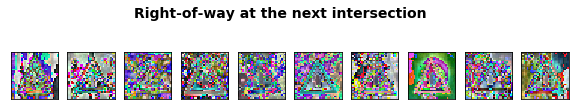

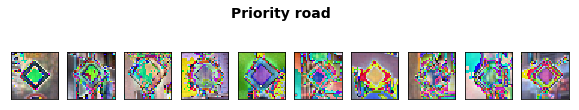

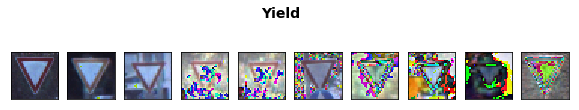

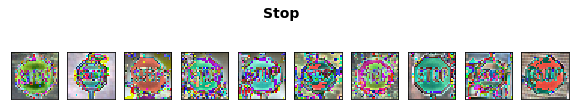

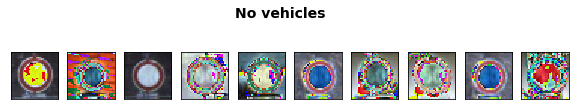

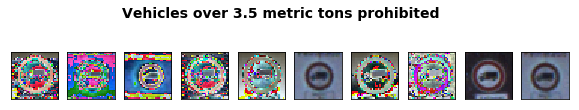

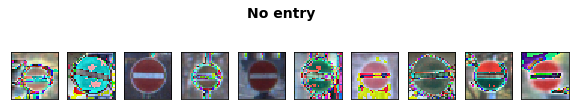

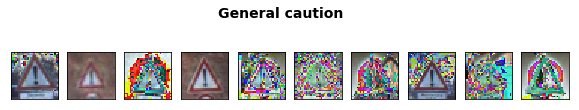

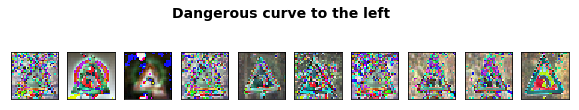

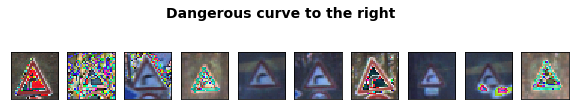

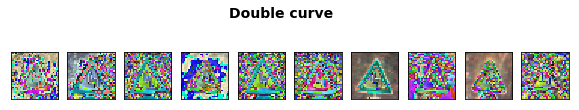

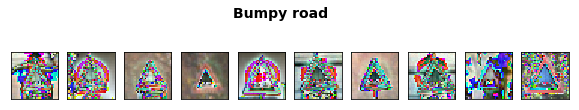

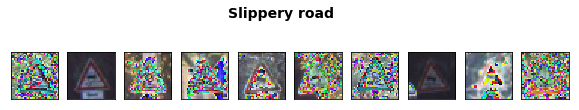

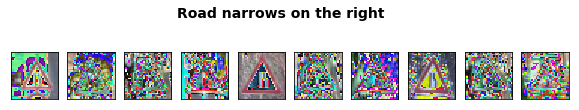

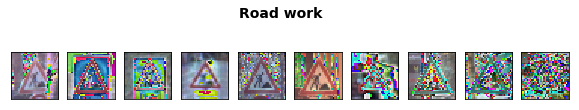

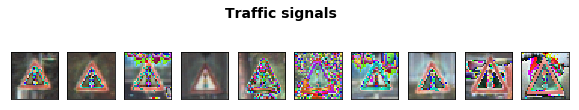

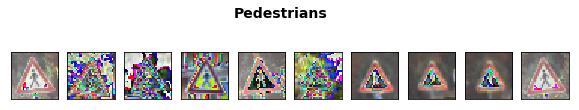

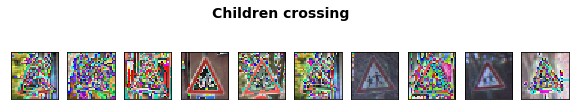

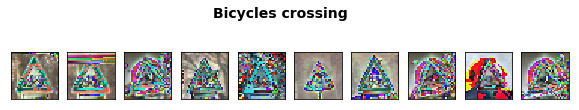

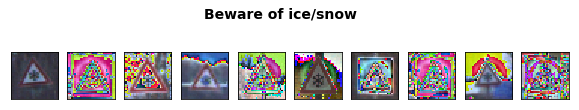

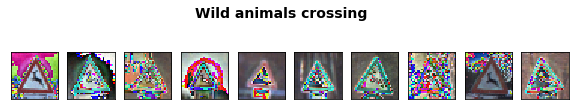

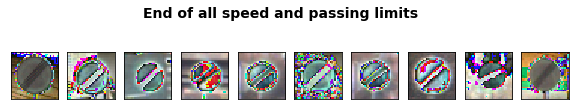

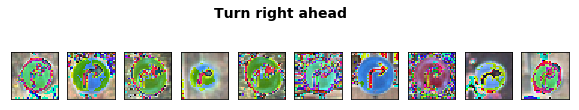

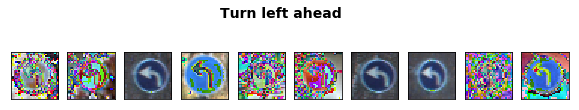

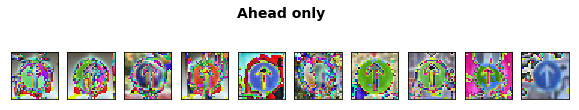

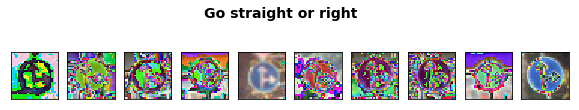

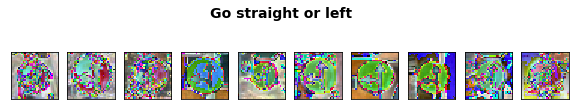

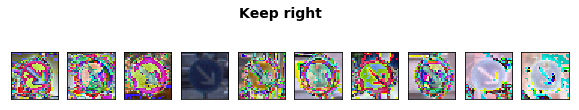

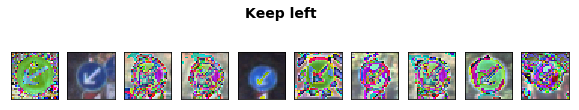

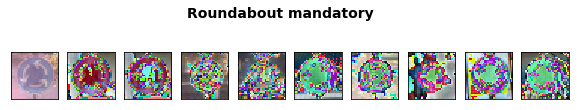

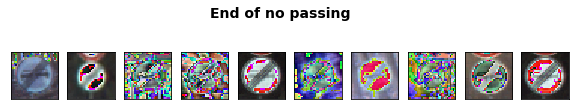

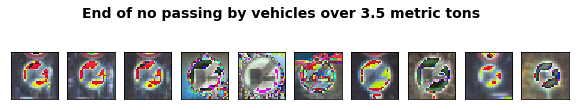

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def preprocessing(X):    
    X /= np.std(X, axis = 0)
    return X

X_train = preprocessing(X_train.astype('f'))
X_test = preprocessing(X_test.astype('f'))
showSample()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
Since each image has different contrast variations, I attempted to center the image(Mean subtract) and nomalize the values to make them have same scale. So I tried 4 mothods combining with combining each methods. After that, I figured out that just nomalize with dividing by standard deviation makes good results as below.
     (Method : Accuracy for test data)
1. Divide by standard deviation : **94% (Best Case, Chosen)** 
2. Nomalized by making range -0.5 ~ +0.5 : **94%** (Certainty in the softmax is little less than 1st method.) 
3. Mean subtract & divide by standard deviation : **91%** 
4. Mean subtract : **89%** 


In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
1. I split the train data into the train data(**75%**),the validation data(**15%**), and suffled them.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Weight Initializer
import math
def xavier_init(n_inputs, n_outputs, uniform=True):
  """Set the parameter initialization using the method described.
  This method is designed to keep the scale of the gradients roughly the same
  in all layers.
  Xavier Glorot and Yoshua Bengio (2010):
           Understanding the difficulty of training deep feedforward neural
           networks. International conference on artificial intelligence and
           statistics.
  Args:
    n_inputs: The number of input nodes into each output.
    n_outputs: The number of output nodes for each input.
    uniform: If true use a uniform distribution, otherwise use a normal.
  Returns:
    An initializer.
  """
  if uniform:
    # 6 was used in the paper.
    init_range = math.sqrt(6.0 / (n_inputs + n_outputs))
    return tf.random_uniform_initializer(-init_range, init_range)
  else:
    # 3 gives us approximately the same limits as above since this repicks
    # values greater than 2 standard deviations from the mean.
    stddev = math.sqrt(3.0 / (n_inputs + n_outputs))
    return tf.truncated_normal_initializer(stddev=stddev)

import tensorflow as tf
from tensorflow.contrib.layers import flatten



def model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Convolutional. Input = 32x32x3. Output = 30x30x64.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu Activation
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 30x30x64. Output = 15x15x64.    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # Convolutional. Input = 15x15x64. Output = 12x12x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 64, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Relu Activation.
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 12x12x128. Output = 6x6x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # Flatten. Input = 6x6x128. Output = 4608.
    fc0   = flatten(conv2)
    
    # Fully Connected. Input = 4608. Output = 120.    
    fc1_W = tf.get_variable("fc1_W", shape=[4608, 120], initializer = xavier_init(4608, 120))     
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Relu Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Fully Connected. Input = 120. Output = 84.    
    fc2_W  = tf.get_variable("fc2_W", shape=[120, 84], initializer = xavier_init(120, 84))     
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Relu Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Fully Connected. Input = 84. Output = 43.    
    fc3_W  = tf.get_variable("fc3_W", shape=[84, 43], initializer = xavier_init(84, 43))     
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
1.  Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x**64**. (64 filters)
2.  Layer 2: Relu
3.  Layer 3: Max pooling. Input = 30x30x64. Output = 15x15x64.
4.  Layer 4: Convolutional. Input = 15x15x64. Output = 12x12x**128**. (128 filters)
5.  Layer 5: Relu
6.  Layer 6: Max pooling. Input = 12x12x128. Output = 6x6x128.
7.  Layer 7: Flatten. Input = 6x6x128. Output = 4608.
8.  Layer 8: Fully Connected. Input = 4608. Output = 120.
9.  Layer 9: Relu
10. Layer10: Fully Connected. Input = 120. Output = 84.
11. Layer11: Relu
12. Layer12: Fully Connected. Input = 84. Output = 43.

I use Xavier's algorithm to optimize initial weight values.


In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.


EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# Adam optimizer.
training_operation = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss_operation) 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.888

EPOCH 2 ...
Validation Accuracy = 0.960

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.981

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.979

EPOCH 8 ...
Validation Accuracy = 0.986

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.994

EPOCH 11 ...
Validation Accuracy = 0.991

EPOCH 12 ...
Validation Accuracy = 0.992

EPOCH 13 ...
Validation Accuracy = 0.984

EPOCH 14 ...
Validation Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.992

EPOCH 16 ...
Validation Accuracy = 0.988

EPOCH 17 ...
Validation Accuracy = 0.986

EPOCH 18 ...
Validation Accuracy = 0.990

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.996

Model saved


In [10]:
with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
1. Adam optimizer
2. EPOCHS = 20
3. BATCH_SIZE = 128
4. Learning rate = 0.001
5. Mean / Softmax cross entropy

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Step 1. Test with Lenet model -> *Bad*

Step 2. Apply Xavier's algorithm to optimize initial weight values. -> **Good**

Step 3. Apply Drop out(0.7) to 2 convolutional layers. -> *Very Bad*

Step 4. Add more convolutional layers with more channels, and smaller filter -> **Very Good**

Step 5. Increase number of epoch -> **Good**

Step 6. Preprocessing with several methods(Q1) -> **Good**


** Order of Importance **
1. Well designed convolutional layers.
2. Preprocessing
3. Proper number of epoch
4. Weight initialize

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

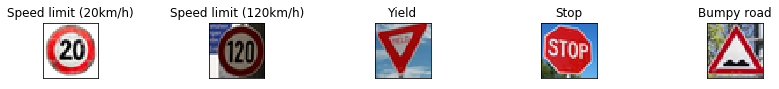

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
    
imgLoc = ["./testimg/0.png"
              ,"./testimg/8.png"
              ,"./testimg/13.png"
              ,"./testimg/14.png"
              ,"./testimg/22.png"]    
imgTitle=[]
X_img = []
y_imgTest = np.array([0,8,13,14,22])
fig, axes = plt.subplots(1,5, figsize=(10,10),subplot_kw={'xticks': [], 'yticks': []})
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=2, hspace=0)

for ax, num in zip(axes.flat, range(5)):    
    X_img.append(np.array(Image.open(imgLoc[num]).resize((32,32),Image.ANTIALIAS)))           
    imgTitle.append(signnames[str(y_imgTest[num])])
    ax.imshow(X_img[num])
    ax.set_title(imgTitle[num])    

X_imgTest = preprocessing(X_img)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

My model is trained by German traffic signs, so when I tried to test with another country's signs, the accuracy was decreased. So I refered to train images, and looked for similar designs(color, text, shape).

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_imgTest, y_imgTest)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Accracy on my 5 newly captured images is 100%, compare to 94% on my test set, and 99% on the validation set. So it seems like that my caputured images are similar with train set, and my model is overfitting.

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = tf.nn.softmax(logits)
    predict = tf.nn.top_k(predict,k=5)
    sess = tf.get_default_session()        

    prediction = sess.run(predict, feed_dict={x:X_imgTest,y:y_imgTest})    
    
print(prediction)

TopKV2(values=array([[  1.00000000e+00,   2.78413071e-18,   1.12180084e-18,
          7.44704324e-21,   6.51596199e-25],
       [  9.98047233e-01,   1.67309609e-03,   1.08423606e-04,
          8.89259172e-05,   3.66800195e-05],
       [  9.64638472e-01,   3.53609696e-02,   4.05623723e-07,
          3.39045272e-08,   1.51869806e-08],
       [  1.00000000e+00,   7.72079862e-24,   1.34090616e-24,
          4.74006994e-25,   8.54270590e-28],
       [  9.99999523e-01,   3.63722648e-07,   6.91051127e-08,
          1.45517209e-10,   2.86809909e-15]], dtype=float32), indices=array([[ 0,  1,  5,  8, 24],
       [ 8,  4,  1,  5, 29],
       [13, 14, 17, 32,  0],
       [14,  0, 25,  1,  5],
       [22, 29, 15, 14, 25]], dtype=int32))


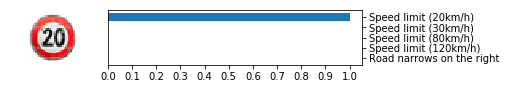

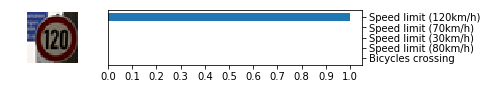

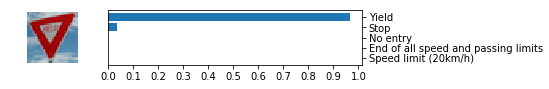

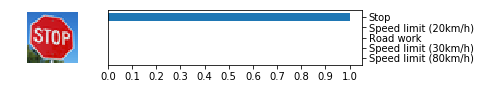

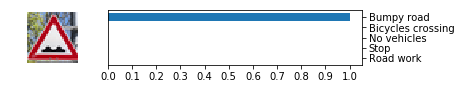

In [14]:
for num, (pos, values) in enumerate(zip(prediction.indices, prediction.values)):
    
    ylabels=[]
    for a in pos:        
        ylabels.append(signnames[str(a)])    
    
    plt.figure(figsize=(6,1))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
    plt.subplot(gs[0])    
    plt.imshow(X_img[num])    
    plt.axis('off')
    
    plt.subplot(gs[1])
    plt.barh(np.arange(5)+.5,values,align='center')
    plt.xticks(np.arange(0.0,1.1,0.1),np.arange(0.0,1.1,0.1))
    plt.yticks(np.arange(5)+.5, ylabels)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    
    
    


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

All my test images show their certainty almost 100% according to visualized softmax probabilities.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.